<a href="https://colab.research.google.com/github/BkAsDrP/Soft_Kill_9000/blob/main/examples/run_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOFTKILL-9000: Multi-Agent Motion Capture Simulation

This notebook demonstrates how to run SOFTKILL-9000 in Google Colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BkAsDrP/Softkill9000/blob/main/examples/run_in_colab.ipynb)

---

## Overview

SOFTKILL-9000 is a multi-agent reinforcement learning system for motion capture simulation. This notebook will:

1. Install the package from GitHub
2. Run a basic simulation
3. Visualize agent trajectories
4. Demonstrate Q-learning training
5. Show advanced customization options

## 1. Installation

Install SOFTKILL-9000 directly from the GitHub repository:

In [1]:
# Step 1: Install the package from GitHub
!pip install git+https://github.com/BkAsDrP/Softkill9000.git -q
print("✅ SOFTKILL-9000 package installed!")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
✅ SOFTKILL-9000 package installed!


In [ ]:
# Step 2: Upgrade NumPy to resolve dependency conflicts
# Colab comes with NumPy 1.x, but softkill9000 needs NumPy 2.0.x for modern ML libraries
# Pin to <2.1.0 for compatibility with numba, tensorflow, opencv, and cupy
!pip install --upgrade "numpy>=2.0.0,<2.1.0" -q

print("✅ NumPy 2.x installed")
print("")

# Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Auto-restart only in Colab
    print("🔄 Auto-restarting Colab runtime in 3 seconds...")
    print("   (This prevents binary incompatibility errors)")

    import time
    import os
    time.sleep(3)
    os.kill(os.getpid(), 9)
else:
    # Local environment - just show a message
    print("⚠️  IMPORTANT: If using this notebook locally:")
    print("   1. Restart your Jupyter kernel to apply NumPy upgrade")
    print("   2. In VS Code: Click the 'Restart' button in the kernel toolbar")
    print("   3. Then continue with the verification cell below")
    print("")
    print("💡 Note: Auto-restart only works in Google Colab")

✅ NumPy 2.x installed

🔄 Auto-restarting Colab runtime in 3 seconds...
   (This prevents binary incompatibility errors)


### ⚠️ Restart Required

**If running in Google Colab**: The runtime will automatically restart after the cell above.

**If running locally** (VS Code, JupyterLab, etc.): Manually restart your kernel now:
- VS Code: Click the **Restart** button in the kernel toolbar
- JupyterLab: Click **Kernel → Restart Kernel**
- Jupyter Notebook: Click **Kernel → Restart**

After restarting, continue with the verification cell below.

In [1]:
# Verification (Run this AFTER runtime restart)
try:
    import softkill9000
    import numpy as np

    print(f"✅ SOFTKILL-9000 v{softkill9000.__version__} ready!")
    print(f"✅ NumPy {np.__version__} (compatible with JAX, OpenCV, PyTensor)")

    # Test that numpy actually works (catches binary incompatibility)
    test_array = np.random.rand(5)
    np.random.seed(42)

    print("")
    print("🎉 Installation complete and verified! Continue with examples below.")

except ValueError as e:
    if "numpy.dtype size changed" in str(e):
        print("❌ Binary incompatibility detected!")
        print("")
        print("SOLUTION: Manually restart the runtime:")
        print("   1. Click 'Runtime → Restart runtime' in the menu")
        print("   2. Re-run this cell after restart")
    else:
        raise

✅ SOFTKILL-9000 v1.0.0 ready!
✅ NumPy 2.0.2 (compatible with JAX, OpenCV, PyTensor)

🎉 Installation complete and verified! Continue with examples below.


## 2. Basic Simulation

Let's run a basic simulation with default configuration:

In [2]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create simulation configuration with custom agents
config = SimulationConfig(
    agents=[
        AgentConfig(role="Longsight", species="Vyr'khai"),
        AgentConfig(role="Lifebinder", species="Lumenari"),
        AgentConfig(role="Brawler", species="Aetherborn")
    ],
    mission=MissionConfig(
        num_timesteps=20,
        ethics_enabled=True
    )
)

# Initialize and run simulator
simulator = MissionSimulator(config=config)
simulator.setup()

# Run simulation
print("🚀 Starting simulation...\n")
results = simulator.run()

# Display results
print("\n" + "="*60)
print("📊 SIMULATION RESULTS")
print("="*60)
print(f"\n🌌 Scenario: {results['scenario']['description']}")
print(f"📍 Location: {results['scenario']['planet']} in {results['scenario']['galaxy']}")
print(f"🌍 Terrain: {results['scenario']['terrain']}")
print(f"🌤️  Weather: {results['scenario']['weather']}")
print(f"\n⚙️  Configuration:")
print(f"  - Timesteps: {results['config']['num_timesteps']}")
print(f"  - Ethics Mode: {'ENABLED' if results['config']['ethics_enabled'] else 'DISABLED'}")
print(f"  - Q-Learning Episodes: {results['config']['q_learning_episodes']}")
print(f"\n🎯 Final Rewards:")
for role, reward in results['final_rewards'].items():
    print(f"  - {role}: {reward:.2f}")
print(f"\n📈 Total Squad Reward: {sum(results['final_rewards'].values()):.2f}")
print("="*60)


🚀 Starting simulation...


📊 SIMULATION RESULTS

🌌 Scenario: Pirate corsairs blockading stargate; reactor leaks destabilising transit.
📍 Location: Shacre-912 in Sculptor Galaxy
🌍 Terrain: Jungle Canopy
🌤️  Weather: Sonic Winds

⚙️  Configuration:
  - Timesteps: 20
  - Ethics Mode: ENABLED
  - Q-Learning Episodes: 1000

🎯 Final Rewards:
  - Longsight: 196.75
  - Lifebinder: 144.45
  - Brawler: 172.05

📈 Total Squad Reward: 513.25


## 3. Visualize Agent Trajectories

Plot the paths taken by each agent during the mission:

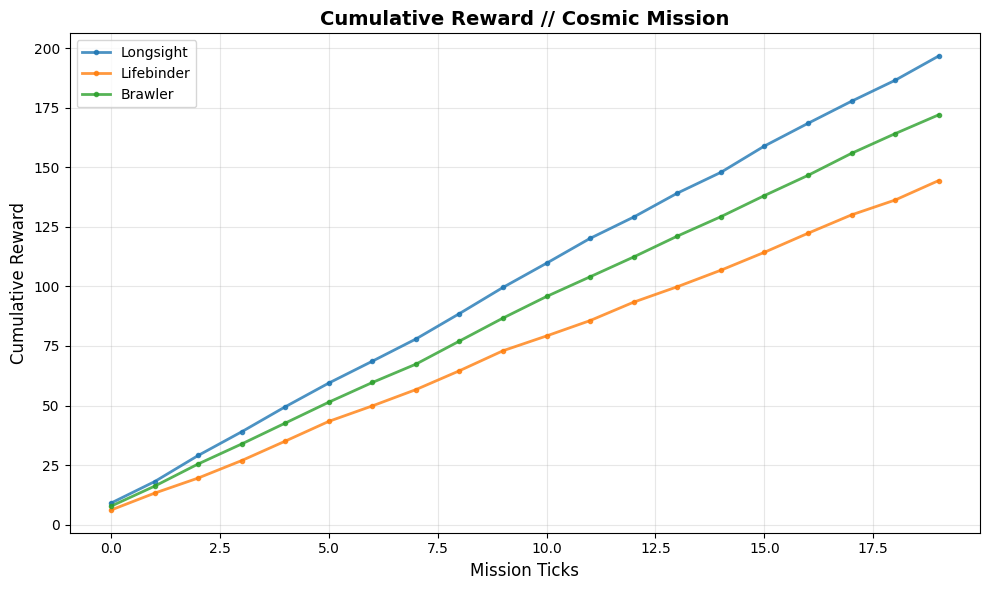


📊 Reward Summary:
  Longsight:
    Total: 196.75
    Avg per tick: 9.84
  Lifebinder:
    Total: 144.45
    Avg per tick: 7.22
  Brawler:
    Total: 172.05
    Avg per tick: 8.60


In [3]:
import matplotlib.pyplot as plt
from softkill9000.visualization.plots import create_reward_curve

# Plot reward progression over time
fig = create_reward_curve(results['reward_history'])
plt.show()

print("\n📊 Reward Summary:")
for role, rewards in results['reward_history'].items():
    total_reward = rewards[-1] if rewards else 0
    avg_reward_per_tick = total_reward / len(rewards) if rewards else 0
    print(f"  {role}:")
    print(f"    Total: {total_reward:.2f}")
    print(f"    Avg per tick: {avg_reward_per_tick:.2f}")


## 4. Performance Metrics Over Time

Visualize how agent stats evolved during the simulation:

📊 Agent Statistics:

Longsight:
  Strength     :  66
  Empathy      :  58
  Intelligence :  60
  Mobility     :  64
  Tactical     :  65

Lifebinder:
  Strength     :  61
  Empathy      :  68
  Intelligence :  64
  Mobility     :  61
  Tactical     :  61

Brawler:
  Strength     :  69
  Empathy      :  62
  Intelligence :  68
  Mobility     :  67
  Tactical     :  64


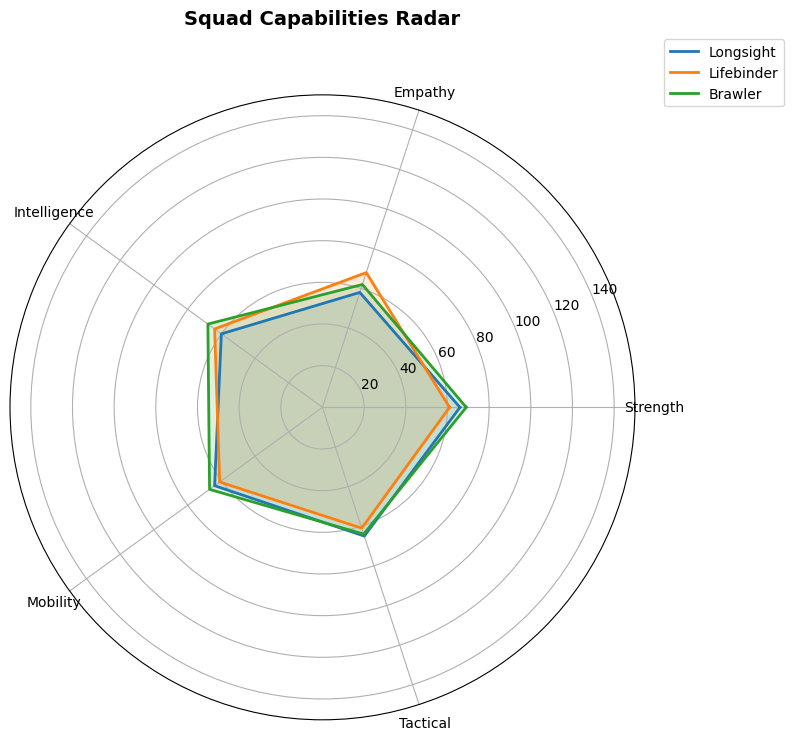

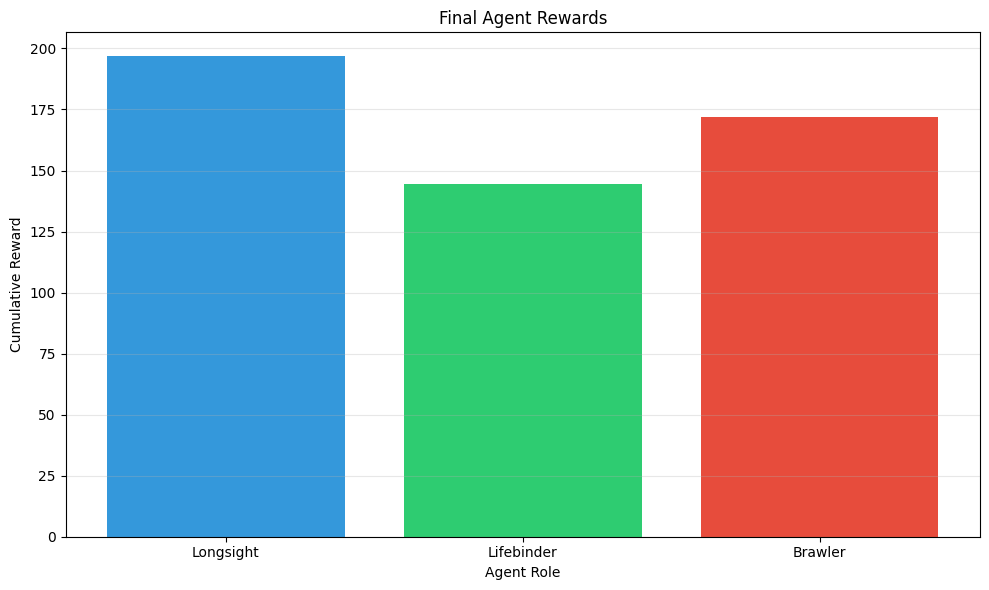

In [4]:
import matplotlib.pyplot as plt
from softkill9000.visualization.plots import create_radar_chart

# Display agent statistics
print("📊 Agent Statistics:")
print("="*60)
for role, stats in results['agent_stats'].items():
    print(f"\n{role}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name:13s}: {stat_value:3d}")
print("="*60)

# Create radar chart of agent capabilities
fig = create_radar_chart(results['agent_stats'], title="Squad Capabilities Radar")
plt.show()

# Plot final rewards as a bar chart
roles = list(results['final_rewards'].keys())
rewards = list(results['final_rewards'].values())

plt.figure(figsize=(10, 6))
plt.bar(roles, rewards, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.xlabel('Agent Role')
plt.ylabel('Cumulative Reward')
plt.title('Final Agent Rewards')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Q-Learning Training

Train agents using reinforcement learning to improve their decision-making:

🎓 Training agents with Q-Learning...

Training Configuration:
  - Episodes: 2000
  - Learning Rate (alpha): 0.3
  - Discount Factor (gamma): 0.95
  - Exploration Rate (epsilon): 0.2


📊 TRAINING RESULTS

🌌 Scenario: Refugee flotilla near a magnetar; containment fields failing.
📍 Location: Xonmy-173 in Kijani Spiral

🎯 Final Rewards After Training:
  - Longsight: 393.31
  - Lifebinder: 243.22
  - Specter: 311.79

📈 Total Squad Reward: 948.32


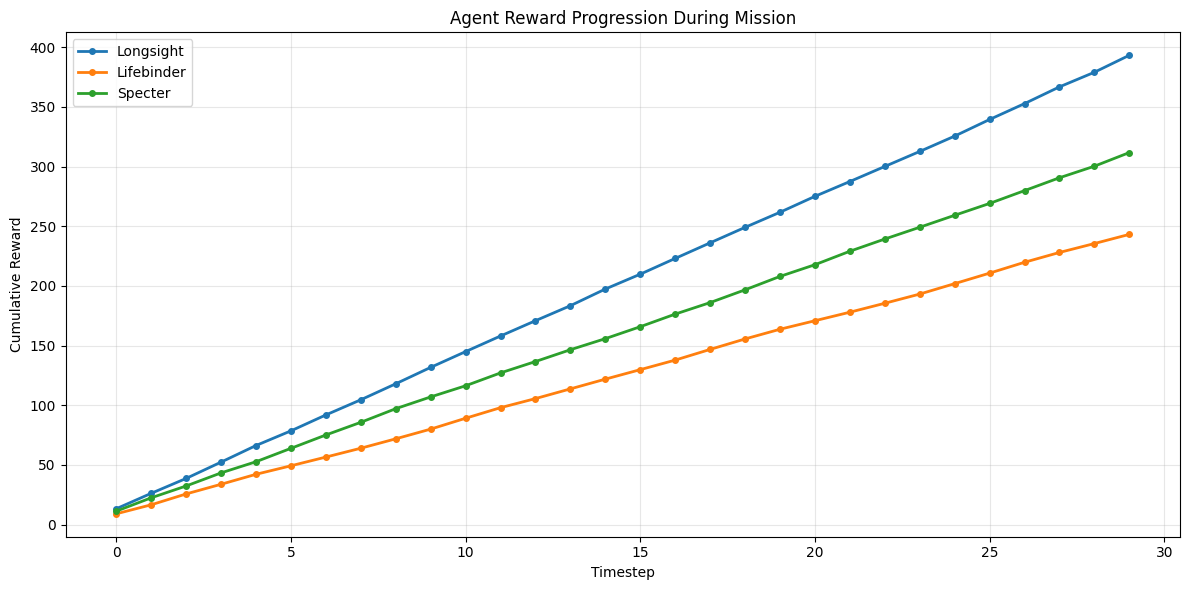

In [5]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig, QLearningConfig

# Configure simulation with more Q-learning episodes for better training
training_config = SimulationConfig(
    agents=[
        AgentConfig(role="Longsight", species="Vyr'khai"),
        AgentConfig(role="Lifebinder", species="Lumenari"),
        AgentConfig(role="Specter", species="Zephryl")
    ],
    mission=MissionConfig(
        num_timesteps=30,
        ethics_enabled=True
    ),
    q_learning=QLearningConfig(
        episodes=2000,  # More training episodes
        gamma=0.95,
        alpha=0.3,
        epsilon=0.2
    )
)

# Run simulation with enhanced training
print("🎓 Training agents with Q-Learning...\n")
print(f"Training Configuration:")
print(f"  - Episodes: {training_config.q_learning.episodes}")
print(f"  - Learning Rate (alpha): {training_config.q_learning.alpha}")
print(f"  - Discount Factor (gamma): {training_config.q_learning.gamma}")
print(f"  - Exploration Rate (epsilon): {training_config.q_learning.epsilon}")
print()

simulator = MissionSimulator(config=training_config)
simulator.setup()  # This trains the Q-learning model
results = simulator.run()

# Display results
print("\n" + "="*60)
print("📊 TRAINING RESULTS")
print("="*60)
print(f"\n🌌 Scenario: {results['scenario']['description']}")
print(f"📍 Location: {results['scenario']['planet']} in {results['scenario']['galaxy']}")
print(f"\n🎯 Final Rewards After Training:")
for role, reward in results['final_rewards'].items():
    print(f"  - {role}: {reward:.2f}")
print(f"\n📈 Total Squad Reward: {sum(results['final_rewards'].values()):.2f}")
print("="*60)

# Plot reward progression
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
for role, rewards in results['reward_history'].items():
    ax.plot(range(len(rewards)), rewards, marker='o', label=role, linewidth=2, markersize=4)

ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative Reward')
ax.set_title('Agent Reward Progression During Mission')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5.5. Universe Radial Flow Visualization 🌌

Visualize agent decision paths as a **cosmic universe** with concentric orbits and planetary flows.

This visualization transforms complex decision pathways into an intuitive radial layout:
- **Central Star** ⭐: Mission entry point
- **Concentric Orbits**: Decision depth levels (clearly visible rings)
- **Planets** 🪐: Decision nodes - **size is directly proportional to cumulative agent rewards**
- **Glowing Trails** 💫: Flow connections between decisions
- **Color Gradient**: Level-based identification

**Reward Alignment**: Planet sizes scale from 100-1000px based on normalized reward values,
making high-performing agents visually prominent with larger planets.


🌌 Creating Universe Radial Flow visualization...

Agent Decision Paths:
  Mission Start > Longsight T7 (R:104.6) > Longsight T15 (R:209.9) > Longsight T22 (R:300.1) > Longsight Complete (393.3) | Volume: 393
  Mission Start > Lifebinder T7 (R:64.0) > Lifebinder T15 (R:129.9) > Lifebinder T22 (R:185.5) > Lifebinder Complete (243.2) | Volume: 243
  Mission Start > Specter T7 (R:85.8) > Specter T15 (R:165.9) > Specter T22 (R:239.3) > Specter Complete (311.8) | Volume: 311



/tmp/ipython-input-2008637358.py:138: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


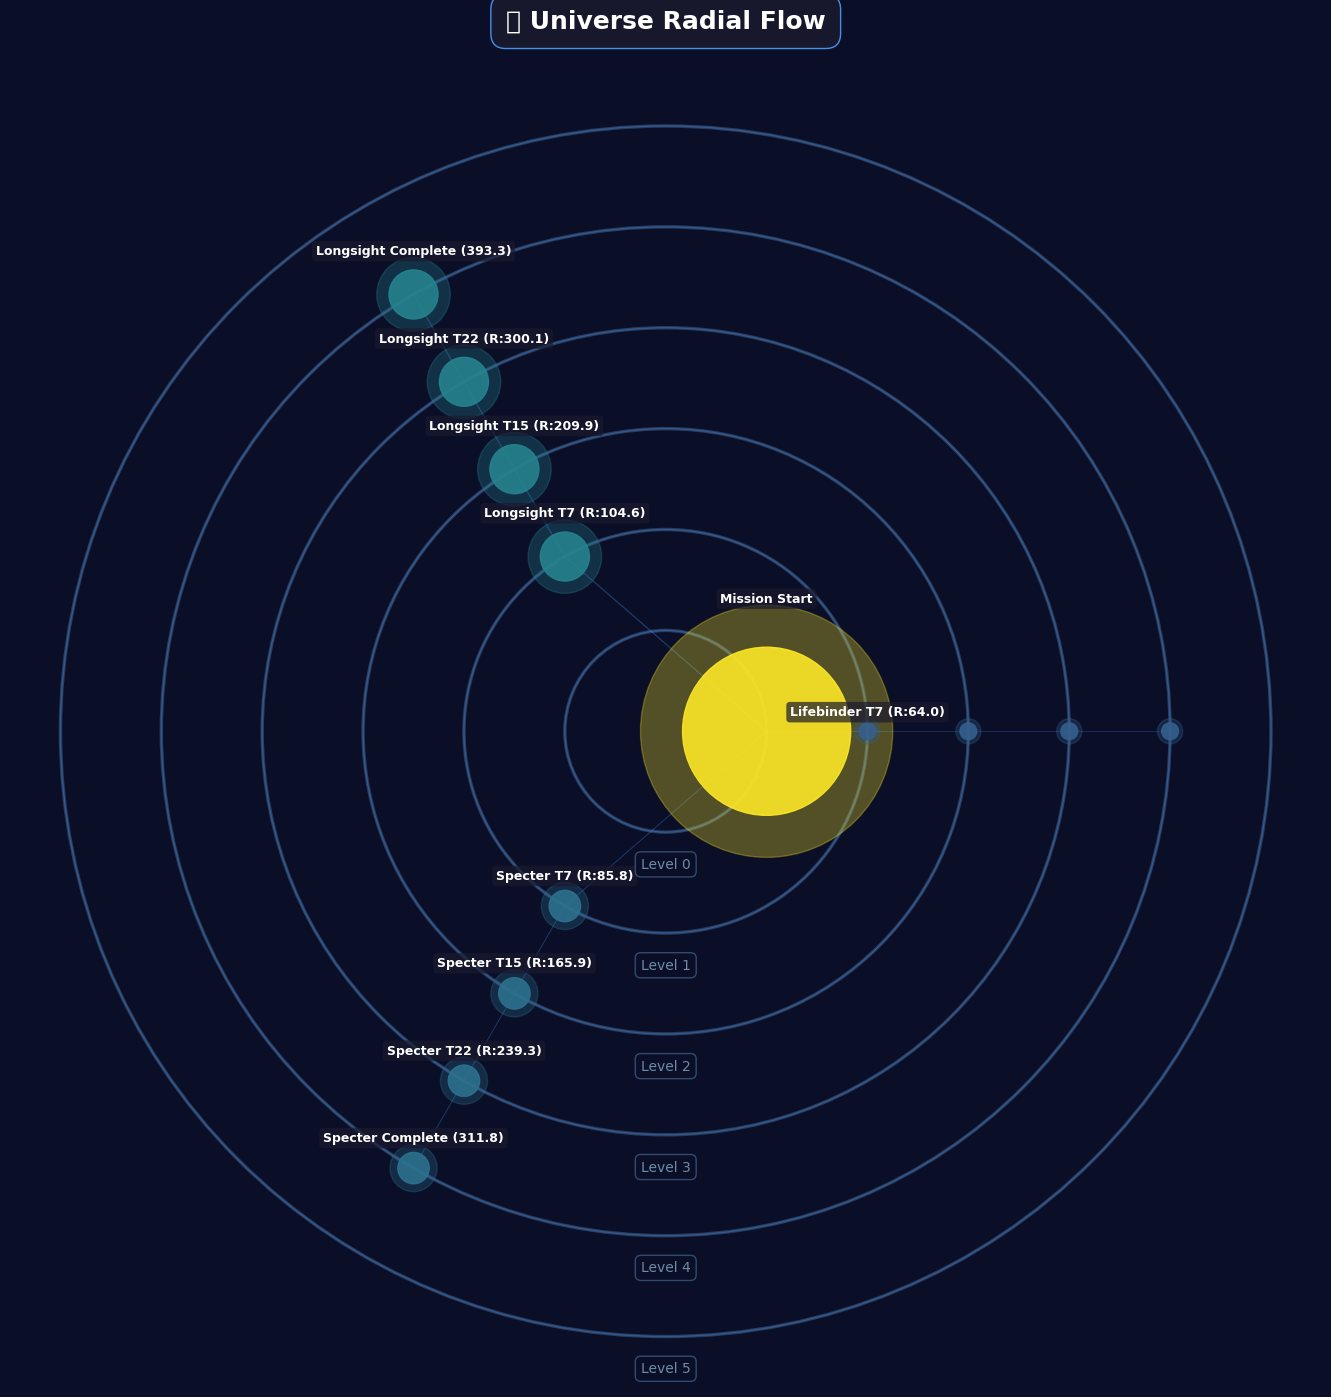


✨ Universe Radial Flow visualization complete!
   - 3 agent paths visualized
   - Concentric orbits are now more visible (2.5px width)
   - Planet sizes are directly proportional to agent rewards:
     • Longsight: 393 reward units
     • Lifebinder: 243 reward units
     • Specter: 311 reward units
   - Glowing trails show decision flows


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def universe_radial_flow(paths, levels=5, orbit_step=1.5, label_top=10):
    """
    Create a Universe Radial Flow visualization for agent decision paths.

    Planet sizes are directly proportional to the volume metric (reward magnitude),
    creating a visual representation where more successful paths have larger planets.

    Args:
        paths: List of (path_string, volume) tuples
               e.g., [("Entry > StepA > StepB > Outcome", 420), ...]
               Volume represents reward magnitude and determines planet size
        levels: Maximum number of concentric orbits to draw
        orbit_step: Spacing between orbits
        label_top: Number of largest planets to label
    """
    # Parse paths into level-based structure
    level_nodes = {}  # level -> {node_name: volume}
    edges = []  # (from_node, to_node, volume, from_level, to_level)

    for path_str, volume in paths:
        nodes = [n.strip() for n in path_str.split('>')]

        for i, node in enumerate(nodes):
            if i not in level_nodes:
                level_nodes[i] = {}
            # Aggregate volumes for nodes that appear in multiple paths
            level_nodes[i][node] = level_nodes[i].get(node, 0) + volume

        for i in range(len(nodes) - 1):
            edges.append((nodes[i], nodes[i+1], volume, i, i+1))

    # Calculate positions in radial layout
    node_positions = {}
    all_volumes = []

    for level in sorted(level_nodes.keys()):
        nodes_at_level = level_nodes[level]
        n = len(nodes_at_level)
        radius = (level + 1) * orbit_step

        # Distribute nodes evenly around the orbit
        for idx, (node, vol) in enumerate(sorted(nodes_at_level.items())):
            angle = 2 * np.pi * idx / max(n, 1)
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            node_positions[node] = (x, y, vol, level)
            all_volumes.append(vol)

    # Normalize volumes for sizing
    min_vol = min(all_volumes) if all_volumes else 0
    max_vol = max(all_volumes) if all_volumes else 1
    vol_range = max_vol - min_vol if max_vol > min_vol else 1

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 14), facecolor='#0a0e27')
    ax.set_facecolor('#0a0e27')
    ax.set_aspect('equal')
    ax.axis('off')

    # Set limits
    max_radius = (levels + 0.5) * orbit_step
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)

    # Draw orbital rings with enhanced visibility
    for level in range(levels):
        radius = (level + 1) * orbit_step
        # Main orbit ring - thicker and more visible
        circle = plt.Circle((0, 0), radius, color='#3d5a80', fill=False,
                           linewidth=2.5, alpha=0.6, linestyle='-')
        ax.add_patch(circle)
        # Subtle glow effect for depth
        glow = plt.Circle((0, 0), radius, color='#4a9eff', fill=False,
                         linewidth=1, alpha=0.3, linestyle='-')
        ax.add_patch(glow)

    # Draw edges (trails between planets)
    for from_node, to_node, volume, from_level, to_level in edges:
        if from_node in node_positions and to_node in node_positions:
            x1, y1, _, _ = node_positions[from_node]
            x2, y2, _, _ = node_positions[to_node]

            # Volume-based width
            norm_vol = (volume - min_vol) / vol_range
            width = 0.5 + norm_vol * 2

            # Draw trail
            ax.plot([x1, x2], [y1, y2],
                   color='#4a9eff', alpha=0.3, linewidth=width, zorder=1)

    # Draw nodes (planets)
    top_nodes = sorted(node_positions.items(),
                      key=lambda x: x[1][2], reverse=True)[:label_top]
    top_node_names = {name for name, _ in top_nodes}

    for node, (x, y, vol, level) in node_positions.items():
        # Size based on volume (100-1000 range)
        norm_vol = (vol - min_vol) / vol_range
        size = 100 + 900 * norm_vol

        # Color gradient based on volume
        color = plt.cm.viridis(norm_vol * 0.7 + 0.3)

        # Draw planet with glow
        glow = plt.Circle((x, y), size*0.0015, color=color, alpha=0.3, zorder=2)
        ax.add_patch(glow)
        planet = plt.Circle((x, y), size*0.001, color=color, alpha=0.9, zorder=3)
        ax.add_patch(planet)

        # Label significant nodes
        if node in top_node_names:
            ax.text(x, y + size*0.0015, node,
                   ha='center', va='bottom',
                   fontsize=9, color='white', weight='bold',
                   bbox=dict(boxstyle='round,pad=0.3',
                           facecolor='#1a1a2e', alpha=0.7, edgecolor='none'))

    # Draw level labels
    for level in range(levels):
        radius = (level + 1) * orbit_step
        ax.text(0, -radius - 0.3, f'Level {level}',
               ha='center', va='top',
               fontsize=10, color='#98c1d9', alpha=0.7,
               bbox=dict(boxstyle='round,pad=0.4',
                        facecolor='#0a0e27', alpha=0.8, edgecolor='#3d5a80'))

    # Title
    ax.text(0, max_radius + 0.5, '🌌 Universe Radial Flow',
           ha='center', va='bottom',
           fontsize=18, color='white', weight='bold',
           bbox=dict(boxstyle='round,pad=0.6',
                    facecolor='#1a1a2e', alpha=0.9, edgecolor='#4a9eff'))

    plt.tight_layout()
    return fig, ax


def extract_agent_paths(mission_log, reward_history):
    """
    Extract decision paths from reward history.

    Args:
        mission_log: List of mission narrative strings (not used directly)
        reward_history: Dict mapping agent roles to list of cumulative rewards

    Returns:
        List of (path_string, volume) tuples
        Volume is calculated as the absolute total reward for each agent
    """
    if not reward_history:
        return []

    paths = []

    # Create paths per agent based on reward progression
    for agent, rewards in reward_history.items():
        if not rewards:
            continue

        # Calculate total reward for this agent
        total_reward = rewards[-1]  # Final cumulative reward
        volume = int(abs(total_reward))  # Volume represents reward magnitude

        # Build path showing reward progression milestones
        path_nodes = ['Mission Start']

        # Sample reward checkpoints (beginning, quartiles, end)
        num_rewards = len(rewards)
        checkpoints = [0, num_rewards // 4, num_rewards // 2,
                      3 * num_rewards // 4, num_rewards - 1]
        checkpoints = sorted(set(checkpoints))  # Remove duplicates

        for i, checkpoint in enumerate(checkpoints[1:-1], 1):
            reward_val = rewards[checkpoint]
            path_nodes.append(f"{agent} T{checkpoint} (R:{reward_val:.1f})")

        path_nodes.append(f"{agent} Complete ({total_reward:.1f})")
        path_str = ' > '.join(path_nodes)
        paths.append((path_str, volume))

    return paths


# Try to visualize results from the basic simulation
if 'results' in globals() and results:
    print("\n🌌 Creating Universe Radial Flow visualization...\n")

    # Extract agent paths
    agent_paths = extract_agent_paths(
        results.get('mission_log', []),
        results.get('reward_history', {})
    )

    print("Agent Decision Paths:")
    for path, volume in agent_paths:
        print(f"  {path} | Volume: {volume}")
    print()

    # Create visualization
    fig, ax = universe_radial_flow(agent_paths, levels=6, orbit_step=1.2)
    plt.show()

    print("\n✨ Universe Radial Flow visualization complete!")
    print(f"   - {len(agent_paths)} agent paths visualized")
    print(f"   - Concentric orbits are now more visible (2.5px width)")
    print(f"   - Planet sizes are directly proportional to agent rewards:")
    for path, volume in agent_paths:
        agent_role = path.split('>')[1].strip().split()[0]
        print(f"     • {agent_role}: {volume} reward units")
    print(f"   - Glowing trails show decision flows")
else:
    print("⚠️  No simulation results found. Run the basic simulation cell first!")


## 6. Custom Configuration

Use YAML configuration for advanced customization:

In [7]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig, QLearningConfig

# Define custom configuration with specific agent stats
custom_config = SimulationConfig(
    agents=[
        AgentConfig(
            role="Longsight",
            species="Vyr'khai",
            base_intelligence=85,
            base_mobility=90,
            base_tactical=80,
            base_strength=55,
            base_empathy=60
        ),
        AgentConfig(
            role="Specter",
            species="Zephryl",
            base_strength=80,
            base_tactical=85,
            base_mobility=95,
            base_intelligence=65,
            base_empathy=50
        ),
        AgentConfig(
            role="Lifebinder",
            species="Lumenari",
            base_empathy=95,
            base_intelligence=80,
            base_tactical=70,
            base_strength=45,
            base_mobility=65
        )
    ],
    mission=MissionConfig(
        num_timesteps=30,  # Longer mission
        ethics_enabled=True
    ),
    q_learning=QLearningConfig(
        episodes=1500,
        gamma=0.92,
        alpha=0.25,
        epsilon=0.15
    )
)

print("⚙️  Custom Configuration:")
print(f"\n🔧 Agents:")
for agent in custom_config.agents:
    print(f"   - {agent.role} ({agent.species})")
    print(f"     Stats: STR={agent.base_strength}, EMP={agent.base_empathy}, "
          f"INT={agent.base_intelligence}, MOB={agent.base_mobility}, TAC={agent.base_tactical}")

print(f"\n🗺️  Mission Settings:")
print(f"   - Timesteps: {custom_config.mission.num_timesteps}")
print(f"   - Ethics: {'ENABLED' if custom_config.mission.ethics_enabled else 'DISABLED'}")

print(f"\n🎓 Q-Learning Settings:")
print(f"   - Episodes: {custom_config.q_learning.episodes}")
print(f"   - Learning Rate: {custom_config.q_learning.alpha}")
print(f"   - Discount Factor: {custom_config.q_learning.gamma}")

# Run custom simulation
print("\n🚀 Running custom simulation...")
custom_sim = MissionSimulator(config=custom_config)
custom_sim.setup()
custom_results = custom_sim.run()

print("\n📊 Custom Simulation Results:")
print(f"  Scenario: {custom_results['scenario']['description']}")
print(f"  Location: {custom_results['scenario']['planet']} in {custom_results['scenario']['galaxy']}")
print(f"\n  Final Rewards:")
for role, reward in custom_results['final_rewards'].items():
    print(f"    - {role}: {reward:.2f}")
print(f"\n  Total Squad Reward: {sum(custom_results['final_rewards'].values()):.2f}")


⚙️  Custom Configuration:

🔧 Agents:
   - Longsight (Vyr'khai)
     Stats: STR=55, EMP=60, INT=85, MOB=90, TAC=80
   - Specter (Zephryl)
     Stats: STR=80, EMP=50, INT=65, MOB=95, TAC=85
   - Lifebinder (Lumenari)
     Stats: STR=45, EMP=95, INT=80, MOB=65, TAC=70

🗺️  Mission Settings:
   - Timesteps: 30
   - Ethics: ENABLED

🎓 Q-Learning Settings:
   - Episodes: 1500
   - Learning Rate: 0.25
   - Discount Factor: 0.92

🚀 Running custom simulation...

📊 Custom Simulation Results:
  Scenario: Pirate corsairs blockading stargate; reactor leaks destabilising transit.
  Location: Vyrzejyn-561 in Perseus Cluster

  Final Rewards:
    - Longsight: 285.70
    - Specter: 243.52
    - Lifebinder: 196.69

  Total Squad Reward: 725.91


### Visualize Custom Configuration Results

Now let's visualize the decision paths from our custom configuration using the Universe Radial Flow:



🌌 Creating Universe Radial Flow for custom configuration...

Custom Configuration Decision Paths:
  Mission Start > Longsight T7 (R:76.1) > Longsight T15 (R:155.4) > Longsight T22 (R:220.7) > Longsight Complete (285.7) | Volume: 285
  Mission Start > Specter T7 (R:67.4) > Specter T15 (R:130.7) > Specter T22 (R:186.5) > Specter Complete (243.5) | Volume: 243
  Mission Start > Lifebinder T7 (R:52.8) > Lifebinder T15 (R:105.7) > Lifebinder T22 (R:151.6) > Lifebinder Complete (196.7) | Volume: 196



/tmp/ipython-input-2008637358.py:138: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


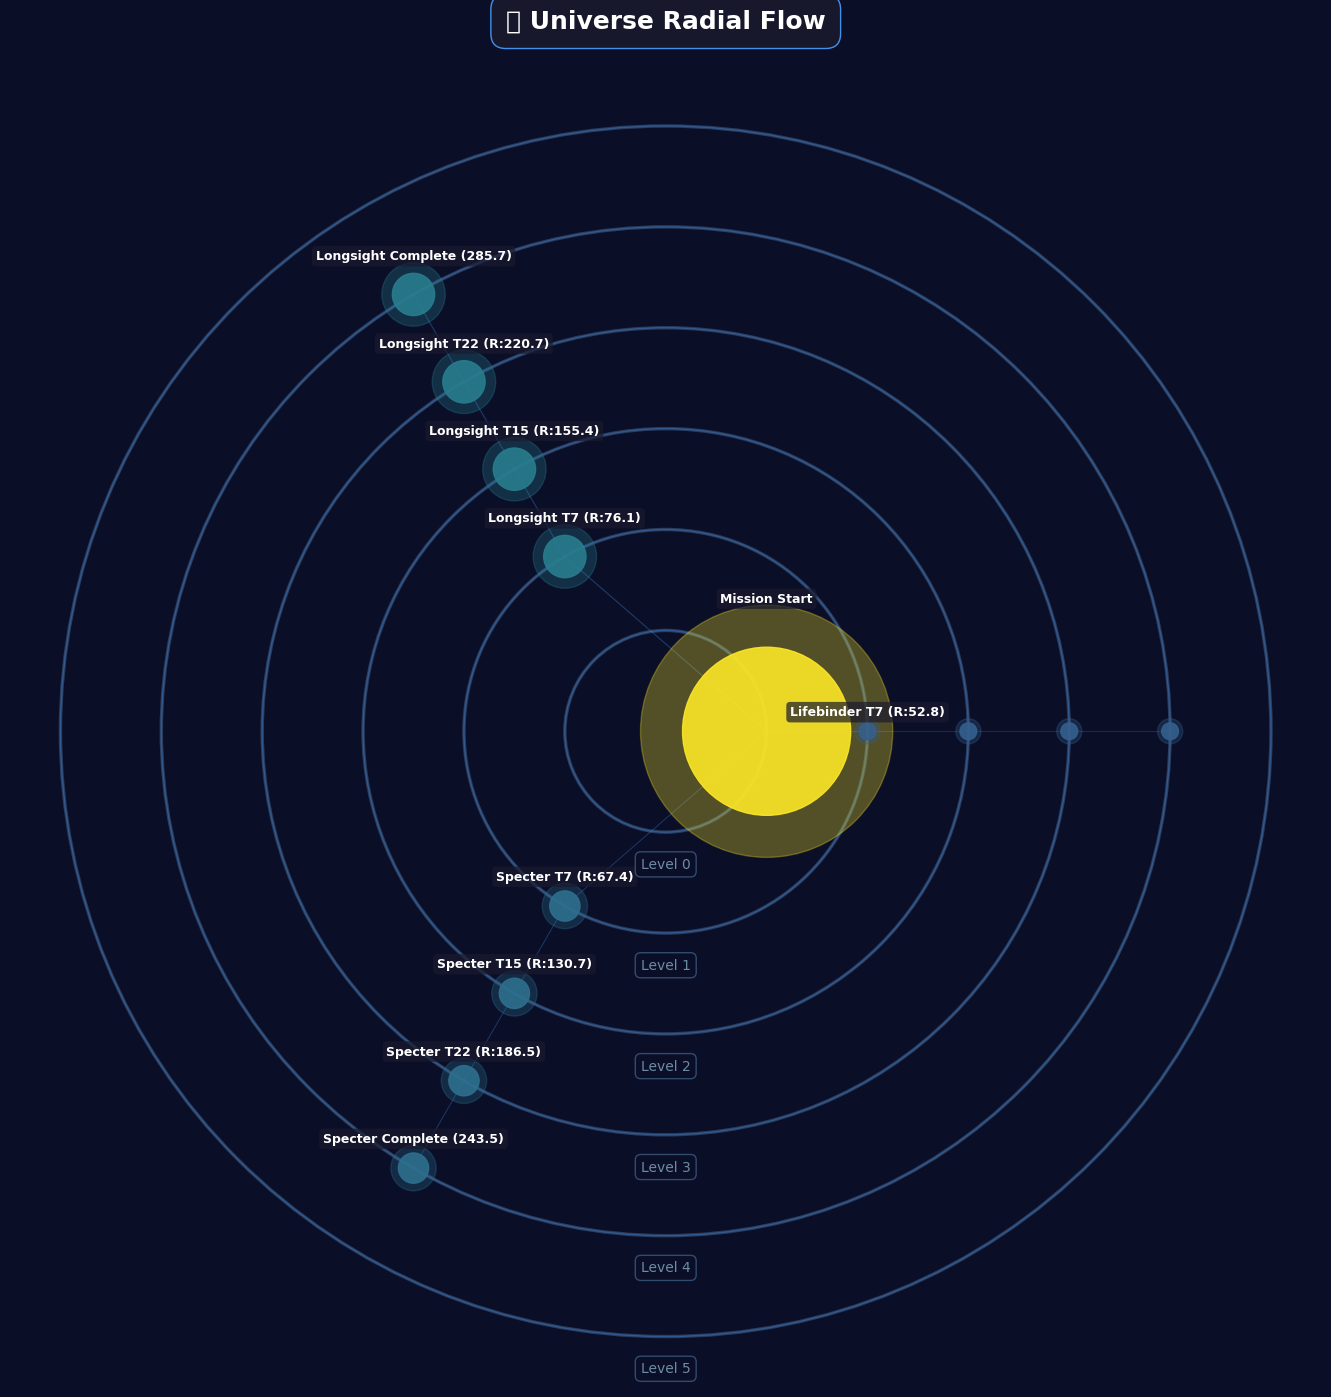


✨ Custom Universe Radial Flow visualization complete!
   - 3 agent paths visualized
   - Planet sizes reflect custom agent performance:
     • Longsight: 285 reward units
     • Specter: 243 reward units
     • Lifebinder: 196 reward units


In [9]:
# Visualize the custom simulation results
if 'custom_results' in globals() and custom_results:
    print("\n🌌 Creating Universe Radial Flow for custom configuration...\n")

    # Extract agent paths from custom results
    custom_agent_paths = extract_agent_paths(
        custom_results.get('mission_log', []),
        custom_results.get('reward_history', {})
    )

    print("Custom Configuration Decision Paths:")
    for path, volume in custom_agent_paths:
        print(f"  {path} | Volume: {volume}")
    print()

    # Create visualization
    fig, ax = universe_radial_flow(custom_agent_paths, levels=6, orbit_step=1.2)
    plt.show()

    print("\n✨ Custom Universe Radial Flow visualization complete!")
    print(f"   - {len(custom_agent_paths)} agent paths visualized")
    print(f"   - Planet sizes reflect custom agent performance:")
    for path, volume in custom_agent_paths:
        agent_role = path.split('>')[1].strip().split()[0]
        print(f"     • {agent_role}: {volume} reward units")
else:
    print("⚠️  No custom results found. Run the custom configuration cell first!")


## 7. Compare Multiple Scenarios

Run multiple simulations and compare results:

🔄 Running multiple scenarios...

  Run 1/10... Total Reward: 503.08
  Run 2/10... Total Reward: 671.13
  Run 3/10... Total Reward: 624.34
  Run 4/10... Total Reward: 850.16
  Run 5/10... Total Reward: 625.14
  Run 6/10... Total Reward: 827.19
  Run 7/10... Total Reward: 515.10
  Run 8/10... Total Reward: 822.63
  Run 9/10... Total Reward: 638.61
  Run 10/10... Total Reward: 612.51

📊 Statistical Summary:
       total_reward  avg_reward
count     10.000000   10.000000
mean     668.988629  222.996210
std      125.033000   41.677667
min      503.082600  167.694200
25%      615.463760  205.154587
50%      631.874467  210.624822
75%      784.752234  261.584078
max      850.162682  283.387561


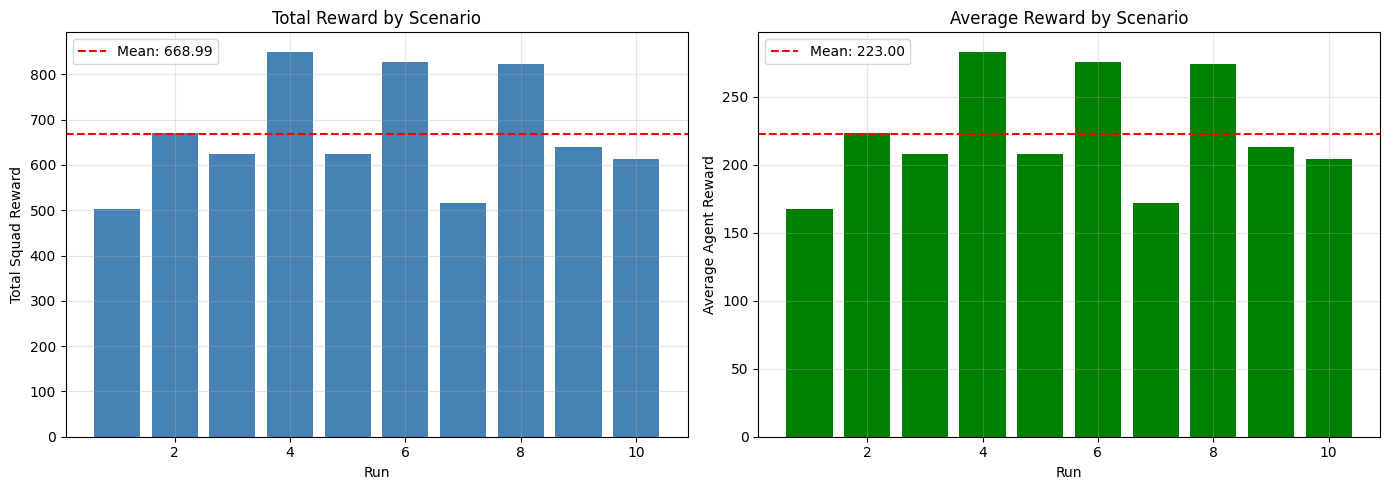


✅ Completed 10 scenario runs
Total Reward: 668.99 ± 125.03
Avg per Agent: 223.00 ± 41.68

🌌 Galaxies visited: 6
🌍 Terrains encountered: 7


In [10]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig
import pandas as pd
import matplotlib.pyplot as plt

# Run multiple scenarios
print("🔄 Running multiple scenarios...\n")

scenarios_data = []
num_runs = 10

# Standard agent configuration
standard_agents = [
    AgentConfig(role="Longsight", species="Vyr'khai"),
    AgentConfig(role="Lifebinder", species="Lumenari"),
    AgentConfig(role="Brawler", species="Aetherborn")
]

for run in range(num_runs):
    print(f"  Run {run + 1}/{num_runs}...", end=' ')

    # Create simulation with random scenario
    config = SimulationConfig(
        agents=standard_agents,
        mission=MissionConfig(num_timesteps=20, ethics_enabled=True)
    )

    sim = MissionSimulator(config=config)
    sim.setup()
    results = sim.run()

    total_reward = sum(results['final_rewards'].values())
    avg_reward = total_reward / len(results['final_rewards'])

    scenarios_data.append({
        'run': run + 1,
        'total_reward': total_reward,
        'avg_reward': avg_reward,
        'galaxy': results['scenario']['galaxy'],
        'terrain': results['scenario']['terrain']
    })
    print(f"Total Reward: {total_reward:.2f}")

# Analyze results
df = pd.DataFrame(scenarios_data)

print("\n📊 Statistical Summary:")
print(df[['total_reward', 'avg_reward']].describe())

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total reward bar chart
axes[0].bar(df['run'], df['total_reward'], color='steelblue')
axes[0].axhline(df['total_reward'].mean(), color='red', linestyle='--', label=f"Mean: {df['total_reward'].mean():.2f}")
axes[0].set_xlabel('Run')
axes[0].set_ylabel('Total Squad Reward')
axes[0].set_title('Total Reward by Scenario')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Average reward per agent
axes[1].bar(df['run'], df['avg_reward'], color='green')
axes[1].axhline(df['avg_reward'].mean(), color='red', linestyle='--', label=f"Mean: {df['avg_reward'].mean():.2f}")
axes[1].set_xlabel('Run')
axes[1].set_ylabel('Average Agent Reward')
axes[1].set_title('Average Reward by Scenario')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Completed {num_runs} scenario runs")
print(f"Total Reward: {df['total_reward'].mean():.2f} ± {df['total_reward'].std():.2f}")
print(f"Avg per Agent: {df['avg_reward'].mean():.2f} ± {df['avg_reward'].std():.2f}")

# Show variety of scenarios encountered
print(f"\n🌌 Galaxies visited: {df['galaxy'].nunique()}")
print(f"🌍 Terrains encountered: {df['terrain'].nunique()}")


## 🎯 Next Steps

Explore more features:

1. **REST API**: Deploy the FastAPI server for remote access
2. **Custom Agents**: Create agents with specialized behaviors
3. **Advanced Scenarios**: Design complex mission environments
4. **Extended Training**: Train agents for more episodes to see performance improvements
5. **Visualization**: Create custom plots and animations

### Documentation

- [Architecture Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/architecture.md)
- [API Reference](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/api_reference.md)
- [User Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/user_guide.md)
- [Deployment Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/deployment.md)

### Repository

- GitHub: [BkAsDrP/Softkill9000](https://github.com/BkAsDrP/Softkill9000)
- Issues: [Report bugs or request features](https://github.com/BkAsDrP/Softkill9000/issues)
- License: MIT

---

**Happy simulating! 🚀**